
### Getting text
In this sample, texts are three ebooks with different topics from Guternburg:
1. Adrift in New York (children fiction)
2. Beethoven (music)
3. Sandwiches (cook)

In [1]:
# define a function to get .txt files in a folder
from os import listdir
def list_textfiles(directory):
    "Return a list of filenames ending in '.txt' in DIRECTORY."
    textfiles = []
    for filename in listdir(directory):
        if filename.endswith(".txt"):
            textfiles.append(directory + "/" + filename)
    return textfiles   

# define a function to read the text in a .txt file

def read_txt(filename):
    try:
        f = open(filename,'r')
        text = f.read()
    finally:
        if f:
            f.close()
    return text

#import harry potter textfiles
filenames = list_textfiles('Plaintexts')
raw_texts = []
for f in filenames:
    raw_texts.append(read_txt(f))
print len(raw_texts)

3


In [2]:
# vectorize corpus
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(input='content', min_df = 1,max_df = 0.8, stop_words = 'english')
X = vectorizer.fit_transform(raw_texts)
# show the matrix of the vectorized corpus
X.toarray()
# show the unique terms (feature names)
feature_names = vectorizer.get_feature_names()

# count tf-idf of each term in the vectorized corpus
from sklearn.feature_extraction.text import TfidfTransformer
transformer = TfidfTransformer()
tfidf = transformer.fit_transform(X)
tfidfArray = tfidf.toarray()

Here we set max_df as 0.7 to remove common words in the results as shown in this example:
http://localhost:8888/notebooks/Desktop/temp/UofA%20/Learn%20python/machine%20learning/Feature%20selection_finding%20distinctive%20words(sklearn-TfidfVectorizer)%20-%20DARIAH.ipynb

max_df : float in range [0.0, 1.0] or int, default=1.0：

tfidf for article 1 is:


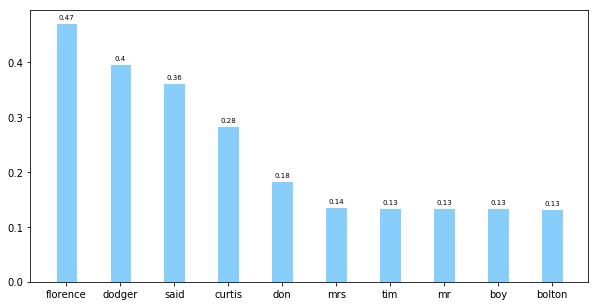

tfidf for article 2 is:


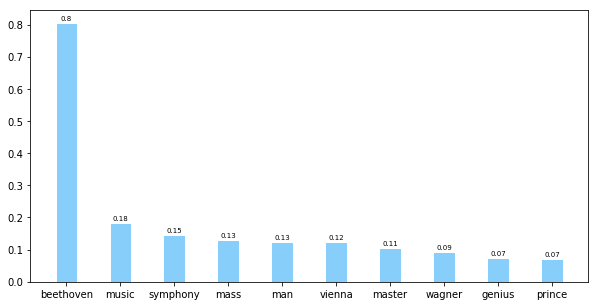

tfidf for article 3 is:


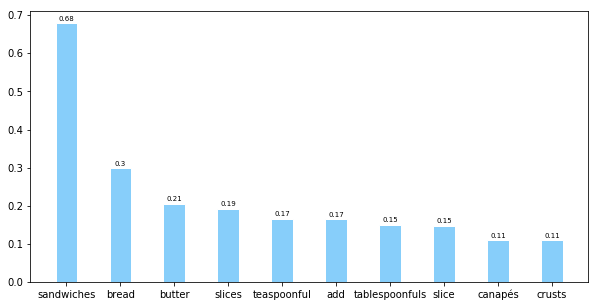

In [3]:
# view the top 5 terms of each news article based on the tfidf score

feature_names = vectorizer.get_feature_names()
li = []
tfidf = []
for l in tfidfArray:

    # sort tf-idf /How to explain this : ???
    #print [[feature_names[x],l[x]] for x in (l*-1).argsort()][:5]
    tfidf.append([(feature_names[x],l[x]) for x in (l*-1).argsort()][:10])

# plot the result
import numpy as np
from matplotlib import pyplot as plt

def plotTfidf (li): # parameter li is a list of tfidf (top 5 words) in the news article. 
                    #e.g. [(u'pens', 0.43280168447929529), (u'the', 0.29211105475772814), (u'bit', 0.21640084223964764), (u'of', 0.2133540325973512), (u'am', 0.18396048627999845)]
    
    # set figure size
    fig = plt.figure(figsize=[10, 5])
    # plot tfidf of a given doc
    labels,Y = zip(*li) # See notes below
    X = np.arange(len(labels))
    plt.bar(X,Y,width = 0.4,facecolor = 'lightskyblue',edgecolor = 'white')  
    plt.xticks(X, labels)# stick labels on x axis
    for x,y in zip(X,Y):
        plt.text(x,y+0.005,round(y,2), ha='center', va= 'bottom',fontsize=7)
    plt.show()    

i = 0
for doc in tfidf:
    print "tfidf for article " + str(i+1) +" is:"
    plotTfidf(doc)
    i +=1   
    
# reference: https://stackoverflow.com/questions/28619595/how-to-get-top-terms-based-on-tf-idf-python